<a href="https://colab.research.google.com/github/Thitiphorn267-3/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

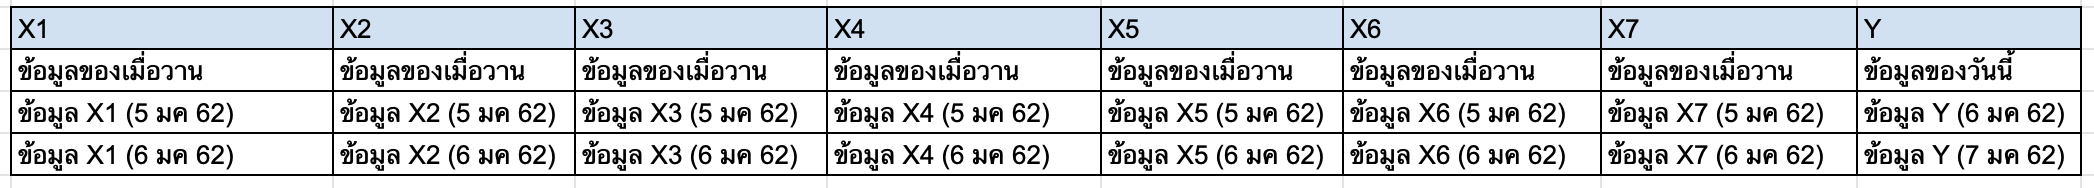



(AtP) Atmospheric pressure = ความกดอากาศ

(ReH) Relative Humidity = ความชื้นสัมพัทธ์

(Wind) Wind Speed = ความเร็วลม

(Cloud) Cloud Amount = จำนวนเมฆ  

(Rain) Rainfall = ปริมาณฝน

(dew_temp) Dew point temperature = อุณหภูมิจุดน้ำค้าง

(Low_temp) lowest temperature = อุณหภูมิต่ำสุด

(Db_tump) Dry-bulb temperature= อุณหภูมิตุ้มแห้ง  

Khon Kaen = ขอนแก่น

Nakhon Phanom = นครพนม

Loei = เลย

Sakon Nakhon = สกลนคร

Nong Khai = หนองคาย

In [1273]:
import pandas as pd
import numpy as np
import pandas as pd
import os

In [1274]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###เรียกไฟล์ + เปลี่ยนชื่อหัวตาราง


In [1275]:
new = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อ

####อากาศตุ้มแห้ง

เรียกไฟล์

In [1276]:
Db_temp_NongKhai = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Db_temp_SakonNakhon = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx",header=4)
Db_temp_Loei = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx",header=4)
Db_temp_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Db_temp_KhonKaen = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)

เปลี่ยนชื่อ column

In [1277]:
Db_temp_KhonKaen = Db_temp_KhonKaen.rename(columns=new)
Db_temp_NongKhai = Db_temp_NongKhai.rename(columns=new)
Db_temp_SakonNakhon = Db_temp_SakonNakhon.rename(columns=new)
Db_temp_Loei = Db_temp_Loei.rename(columns=new)
Db_temp_NakhonPhanom = Db_temp_NakhonPhanom.rename(columns=new)

####อุณหภูมิต่ำสุด

เรียกไฟล์

In [1278]:
Low_temp_KhonKaen = pd.read_excel ('/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Low_temp_NakhonPhanom = pd.read_excel ('/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Low_temp_Loei = pd.read_excel ('/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)
Low_temp_SakonNakhon = pd.read_excel ('/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
Low_temp_NongKhai = pd.read_excel ('/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)

เปลี่ยนชื่อcolumn

In [1279]:
Low_temp_KhonKaen = Low_temp_KhonKaen.rename(columns=new)
Low_temp_NakhonPhanom = Low_temp_NakhonPhanom.rename(columns=new)
Low_temp_Loei = Low_temp_Loei.rename(columns=new)
Low_temp_SakonNakhon = Low_temp_SakonNakhon.rename(columns=new)
Low_temp_NongKhai = Low_temp_NongKhai.rename(columns=new)

####อุณหภูมิจุดน้ำค้าง

เรียกไฟล์

In [1280]:
dew_temp_KhonKaen = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
dew_temp_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
dew_temp_SakonNakhon = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx",header=4)
dew_temp_NongKhai = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
dew_temp_Loei = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx",header=4)

เปลี่ยนชื่อ column

In [1281]:
dew_temp_KhonKaen = dew_temp_KhonKaen.rename(columns=new)
dew_temp_NakhonPhanom = dew_temp_NakhonPhanom.rename(columns=new)
dew_temp_SakonNakhon = dew_temp_SakonNakhon.rename(columns=new)
dew_temp_NongKhai = dew_temp_NongKhai.rename(columns=new)
dew_temp_Loei = dew_temp_Loei.rename(columns=new)

####ความกดอากาศ

เรียกไฟล์

In [1282]:
AtP_KhonKaen = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
AtP_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
AtP_SakonNakhon = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
AtP_NongKhai = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
AtP_Loei = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)

เปลี่ยนชื่อ column

In [1283]:
AtP_KhonKaen = AtP_KhonKaen.rename(columns=new)
AtP_NakhonPhanom = AtP_NakhonPhanom.rename(columns=new)
AtP_SakonNakhon = AtP_SakonNakhon.rename(columns=new)
AtP_NongKhai = AtP_NongKhai.rename(columns=new)
AtP_Loei = AtP_Loei.rename(columns=new)

####ความชื้นสัมพัทธ์

เรียกไฟล์

In [1284]:
ReH_KhonKaen = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
ReH_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
ReH_SakonNakhon = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
ReH_NongKhai = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
ReH_Loei = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)

เปลี่ยนชื่อ column

In [1285]:
ReH_KhonKaen = ReH_KhonKaen.rename(columns=new)
ReH_NakhonPhanom = ReH_NakhonPhanom.rename(columns=new)
ReH_SakonNakhon = ReH_SakonNakhon.rename(columns=new)
ReH_NongKhai = ReH_NongKhai.rename(columns=new)
ReH_Loei = ReH_Loei.rename(columns=new)

####ความเร็วลม

เรียกไฟล์

In [1286]:
Wind_KhonKaen = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
Wind_NakhonPhanom  = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
Wind_SakonNakhon = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx",header=4)
Wind_NongKhai = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx",header=4)
Wind_Loei = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx",header=4)

เปลี่ยนชื่อ column

In [1287]:
Wind_KhonKaen = Wind_KhonKaen.rename(columns=new)
Wind_NakhonPhanom = Wind_NakhonPhanom.rename(columns=new)
Wind_SakonNakhon = Wind_SakonNakhon.rename(columns=new)
Wind_NongKhai = Wind_NongKhai.rename(columns=new)
Wind_Loei = Wind_Loei.rename(columns=new)

####จำนวนเมฆ

เรียกไฟล์

In [1288]:
Cloud_KhonKaen = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx",header=4)
Cloud_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4)
Cloud_SakonNakhon = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx",header=4)
Cloud_NongKhai = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx",header=4)
Cloud_Loei = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx",header=4)

เปลี่ยนชื่อ column

In [1289]:
Cloud_KhonKaen  = Cloud_KhonKaen.rename(columns=new)
Cloud_NakhonPhanom = Cloud_NakhonPhanom.rename(columns=new)
Cloud_SakonNakhon = Cloud_SakonNakhon.rename(columns=new)
Cloud_NongKhai = Cloud_NongKhai.rename(columns=new)
Cloud_Loei = Cloud_Loei.rename(columns=new)

####ปริมาณน้ำฝน

เรียกไฟล์

In [1290]:
Rain_KhonKaen = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
Rain_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
Rain_SakonNakhon = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx",header=4)
Rain_NongKhai = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx",header=4)
Rain_Loei = pd.read_excel("/content/drive/MyDrive/bsc_dpdm23_data/midterm/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx",header=4)

เปลี่ยนชื่อ column

In [1291]:
Rain_KhonKaen = Rain_KhonKaen.rename(columns=new)
Rain_NakhonPhanom = Rain_NakhonPhanom.rename(columns=new)
Rain_SakonNakhon = Rain_SakonNakhon.rename(columns=new)
Rain_NongKhai = Rain_NongKhai.rename(columns=new)
Rain_Loei = Rain_Loei.rename(columns=new)

#ตรวจสอบค่า missing และแก้ไขค่า missing

จังหวัดเลย column ไม่ครบ

In [1292]:
a = Db_temp_Loei.iloc[:,3:35].mean().tolist()
b = dew_temp_Loei.iloc[:,3:35].mean().tolist()

<ipython-input-1292-0e388dd5e16a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = Db_temp_Loei.iloc[:,3:35].mean().tolist()
<ipython-input-1292-0e388dd5e16a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b = dew_temp_Loei.iloc[:,3:35].mean().tolist()


In [1293]:
R1 = Rain_Loei.iloc[50:,:3]
R2 = Rain_Loei.iloc[50:,:3]

In [1294]:
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [1295]:
R1.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)
R2.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)

In [1296]:
R2

,ที่,สถานี,เดือน/ปี
50,48,353201-เลย จ.เลย,2021-10-01
51,49,353201-เลย จ.เลย,2021-11-01
52,50,353201-เลย จ.เลย,2021-12-01
53,1,353201-เลย จ.เลย,2022-01-01
54,2,353201-เลย จ.เลย,2022-02-01


In [1297]:
dew_temp_Loei = pd.concat([dew_temp_Loei,R1])
Db_temp_Loei = pd.concat([Db_temp_Loei,R2])

##อากาศตุ้มแห้ง

### หนองคาย

ตรวจสอบค่า Missing ในข้อมูล

In [1298]:
Db_temp_NongKhai = Db_temp_NongKhai.replace('-',np.NaN)

In [1299]:
Db_temp_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

พบค่า missing ในวันที่ 29 30 31 อาจเกิดจากจำนวนวันแต่ละเดือนที่ไม่เท่ากัน

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1300]:
for i in range(len(Db_temp_NongKhai['ที่'])):Db_temp_NongKhai.iloc[i,:]=Db_temp_NongKhai.iloc[i,:].fillna(Db_temp_NongKhai.iloc[i]['ค่าเฉลี่ย'])

In [1301]:
Db_temp_NongKhai.isnull().any() #ตรวจ Missing ซ้ำอีกรอบ

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [1302]:
Db_temp_NongKhai.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,25.9,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,25.6,25.6,25.6


###สกลนคร

ตรวจสอบค่า Missing ในข้อมูล

In [1303]:
Db_temp_SakonNakhon = Db_temp_SakonNakhon.replace('-',np.NaN)

In [1304]:
Db_temp_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1305]:
for i in range(len(Db_temp_SakonNakhon['ที่'])):Db_temp_SakonNakhon.iloc[i,:]=Db_temp_SakonNakhon.iloc[i,:].fillna(Db_temp_SakonNakhon.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [1306]:
Db_temp_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###เลย

ตรวจสอบค่า Missing ในข้อมูล

In [1307]:
Db_temp_Loei = Db_temp_Loei.replace('-',np.NaN)

In [1308]:
Db_temp_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1309]:
for i in range(len(Db_temp_Loei['ที่'])):Db_temp_Loei.iloc[i,:]=Db_temp_Loei.iloc[i,:].fillna(Db_temp_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [1310]:
Db_temp_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

###นครพนม

ตรวจสอบค่า Missing ในข้อมูล

In [1311]:
Db_temp_NakhonPhanom = Db_temp_NakhonPhanom.replace('-',np.NaN)

In [1312]:
Db_temp_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1313]:
for i in range(len(Db_temp_NakhonPhanom['ที่'])):Db_temp_NakhonPhanom.iloc[i,:]=Db_temp_NakhonPhanom.iloc[i,:].fillna(Db_temp_NakhonPhanom.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [1314]:
Db_temp_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###ขอนแก่น

ตรวจสอบค่า Missing ในข้อมูล

In [1315]:
Db_temp_KhonKaen = Db_temp_KhonKaen.replace('-',np.NaN)

In [1316]:
Db_temp_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1317]:
for i in range(len(Db_temp_KhonKaen['ที่'])):Db_temp_KhonKaen.iloc[i,:]=Db_temp_KhonKaen.iloc[i,:].fillna(Db_temp_KhonKaen.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [1318]:
Db_temp_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##อุณหภูมิต่ำสุด

### หนองคาย

ตรวจสอบค่า Missing ในข้อมูล

In [1319]:
Low_temp_NongKhai = Low_temp_NongKhai.replace('-',np.NaN)

In [1320]:
Low_temp_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1321]:
for i in range(len(Low_temp_NongKhai['ที่'])):Low_temp_NongKhai.iloc[i,:]=Low_temp_NongKhai.iloc[i,:].fillna(Low_temp_NongKhai.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [1322]:
Low_temp_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###สกลนคร

ตรวจสอบค่า Missing ในข้อมูล

In [1323]:
Low_temp_SakonNakhon = Low_temp_SakonNakhon.replace('-',np.NaN)

In [1324]:
Low_temp_SakonNakhon.isnull().any()

ที่           True
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1325]:
for i in range(len(Low_temp_SakonNakhon['ที่'])):Low_temp_SakonNakhon.iloc[i,:]=Low_temp_SakonNakhon.iloc[i,:].fillna(Low_temp_SakonNakhon.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [1326]:
Low_temp_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###เลย

ตรวจสอบค่า Missing ในข้อมูล

In [1327]:
Low_temp_Loei = Low_temp_Loei.replace('-',np.NaN)
Low_temp_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12            True
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1328]:
for i in range(len(Low_temp_Loei['ที่'])):Low_temp_Loei.iloc[i,:]=Low_temp_Loei.iloc[i,:].fillna(Low_temp_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Low_temp_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###นครพนม

ตรวจสอบค่า Missing ในข้อมูล

In [1329]:
Low_temp_NakhonPhanom = Low_temp_NakhonPhanom.replace('-',np.NaN)
Low_temp_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5             True
6            False
7            False
8            False
9            False
10           False
11            True
12           False
13           False
14           False
15           False
16            True
17            True
18            True
19            True
20           False
21            True
22            True
23            True
24           False
25            True
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1330]:
for i in range(len(Low_temp_NakhonPhanom['ที่'])):Low_temp_NakhonPhanom.iloc[i,:]=Low_temp_NakhonPhanom.iloc[i,:].fillna(Low_temp_NakhonPhanom.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Low_temp_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###ขอนแก่น

ตรวจสอบค่า Missing ในข้อมูล

In [1331]:
Low_temp_KhonKaen= Low_temp_KhonKaen.replace('-',np.NaN)
Low_temp_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25           False
26           False
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1332]:
for i in range(len(Low_temp_KhonKaen['ที่'])):Low_temp_KhonKaen.iloc[i,:]=Low_temp_KhonKaen.iloc[i,:].fillna(Low_temp_KhonKaen.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Low_temp_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##อุณภูมิจุดน้ำค้าง

### หนองคาย

ตรวจสอบค่า Missing ในข้อมูล

In [1333]:
dew_temp_NongKhai = dew_temp_NongKhai.replace('-',np.NaN)
dew_temp_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1334]:
for i in range(len(dew_temp_NongKhai['ที่'])):dew_temp_NongKhai.iloc[i,:]=dew_temp_NongKhai.iloc[i,:].fillna(dew_temp_NongKhai.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
dew_temp_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

### สกลนคร

ตรวจสอบค่า Missing ในข้อมูล

In [1335]:
dew_temp_SakonNakhon = dew_temp_SakonNakhon.replace('-',np.NaN)
dew_temp_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1336]:
for i in range(len(dew_temp_SakonNakhon['ที่'])):dew_temp_SakonNakhon.iloc[i,:]=dew_temp_SakonNakhon.iloc[i,:].fillna(dew_temp_SakonNakhon.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
dew_temp_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

### เลย

ตรวจสอบค่า Missing ในข้อมูล

In [1337]:
dew_temp_Loei = dew_temp_Loei.replace('-',np.NaN)
dew_temp_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1338]:
for i in range(len(dew_temp_Loei['ที่'])):dew_temp_Loei.iloc[i,:]=dew_temp_Loei.iloc[i,:].fillna(dew_temp_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
dew_temp_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

### นครพนม

ตรวจสอบค่า Missing ในข้อมูล

In [1339]:
dew_temp_NakhonPhanom = dew_temp_NakhonPhanom.replace('-',np.NaN)
dew_temp_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1340]:
for i in range(len(dew_temp_NakhonPhanom['ที่'])):dew_temp_NakhonPhanom.iloc[i,:]=dew_temp_NakhonPhanom.iloc[i,:].fillna(dew_temp_NakhonPhanom.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
dew_temp_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

### ขอนแก่น

ตรวจสอบค่า Missing ในข้อมูล

In [1341]:
dew_temp_KhonKaen  = dew_temp_KhonKaen.replace('-',np.NaN)
dew_temp_KhonKaen .isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1342]:
for i in range(len(dew_temp_KhonKaen ['ที่'])):dew_temp_KhonKaen.iloc[i,:]=dew_temp_KhonKaen.iloc[i,:].fillna(dew_temp_KhonKaen.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
dew_temp_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##ความกดอากาศ

### หนองคาย

ตรวจสอบค่า Missing ในข้อมูล

In [1343]:
AtP_NongKhai = AtP_NongKhai.replace('-',np.NaN)
AtP_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1344]:
for i in range(len(AtP_NongKhai['ที่'])):AtP_NongKhai.iloc[i,:]=AtP_NongKhai.iloc[i,:].fillna(AtP_NongKhai.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
dew_temp_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###สกลนคร

ตรวจสอบค่า Missing ในข้อมูล

In [1345]:
AtP_SakonNakhon = AtP_SakonNakhon.replace('-',np.NaN)
AtP_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1346]:
for i in range(len(AtP_SakonNakhon['ที่'])):AtP_SakonNakhon.iloc[i,:]=AtP_SakonNakhon.iloc[i,:].fillna(AtP_SakonNakhon.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
AtP_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###เลย

ตรวจสอบค่า Missing ในข้อมูล

In [1347]:
AtP_Loei = AtP_Loei .replace('-',np.NaN)
AtP_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1348]:
for i in range(len(AtP_Loei['ที่'])):AtP_Loei.iloc[i,:]=AtP_Loei.iloc[i,:].fillna(AtP_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
AtP_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###นครพนม

ตรวจสอบค่า Missing ในข้อมูล

In [1349]:
AtP_NakhonPhanom = AtP_NakhonPhanom.replace('-',np.NaN)
AtP_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1350]:
for i in range(len(AtP_NakhonPhanom['ที่'])):AtP_NakhonPhanom.iloc[i,:]=AtP_NakhonPhanom.iloc[i,:].fillna(AtP_NakhonPhanom.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
AtP_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###ขอนแก่น

ตรวจสอบค่า Missing ในข้อมูล

In [1351]:
AtP_KhonKaen = AtP_KhonKaen.replace('-',np.NaN)
AtP_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1352]:
for i in range(len(AtP_KhonKaen['ที่'])):AtP_KhonKaen.iloc[i,:]=AtP_KhonKaen.iloc[i,:].fillna(AtP_KhonKaen.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
AtP_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##ความชื้นสัมพัทธ์

### หนองคาย

ตรวจสอบค่า Missing ในข้อมูล

In [1353]:
ReH_NongKhai = ReH_NongKhai.replace('-',np.NaN)
ReH_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1354]:
for i in range(len(ReH_NongKhai['ที่'])):ReH_NongKhai.iloc[i,:]=ReH_NongKhai.iloc[i,:].fillna(ReH_NongKhai.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
ReH_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###สกลนคร

ตรวจสอบค่า Missing ในข้อมูล

In [1355]:
ReH_SakonNakhon = ReH_SakonNakhon.replace('-',np.NaN)
ReH_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1356]:
for i in range(len(ReH_SakonNakhon['ที่'])):ReH_SakonNakhon.iloc[i,:]=ReH_SakonNakhon.iloc[i,:].fillna(ReH_SakonNakhon.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
ReH_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###เลย

ตรวจสอบค่า Missing ในข้อมูล

In [1357]:
ReH_Loei = ReH_Loei.replace('-',np.NaN)
ReH_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1358]:
for i in range(len(ReH_Loei['ที่'])):ReH_Loei.iloc[i,:]=ReH_Loei.iloc[i,:].fillna(ReH_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
ReH_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###นครพนม

ตรวจสอบค่า Missing ในข้อมูล

In [1359]:
ReH_NakhonPhanom = ReH_NakhonPhanom.replace('-',np.NaN)
ReH_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1360]:
for i in range(len(ReH_NakhonPhanom['ที่'])):ReH_NakhonPhanom.iloc[i,:]=ReH_NakhonPhanom.iloc[i,:].fillna(ReH_NakhonPhanom.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
ReH_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###ขอนแก่น

ตรวจสอบค่า Missing ในข้อมูล

In [1361]:
ReH_KhonKaen = ReH_KhonKaen.replace('-',np.NaN)
ReH_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1362]:
for i in range(len(ReH_KhonKaen['ที่'])):ReH_KhonKaen.iloc[i,:]=ReH_KhonKaen.iloc[i,:].fillna(ReH_KhonKaen.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
ReH_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##ความเร็วลม

### หนองคาย

ตรวจสอบค่า Missing ในข้อมูล

In [1363]:
Wind_NongKhai = Wind_NongKhai.replace('-',np.NaN)
Wind_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4             True
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1364]:
for i in range(len(Wind_NongKhai['ที่'])):Wind_NongKhai.iloc[i,:]=Wind_NongKhai.iloc[i,:].fillna(Wind_NongKhai.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Wind_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

### สกลนคร

ตรวจสอบค่า Missing ในข้อมูล

In [1365]:
Wind_SakonNakhon = Wind_SakonNakhon.replace('-',np.NaN)
Wind_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4             True
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20            True
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1366]:
for i in range(len(Wind_SakonNakhon['ที่'])):Wind_SakonNakhon.iloc[i,:]=Wind_SakonNakhon.iloc[i,:].fillna(Wind_SakonNakhon.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Wind_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###เลย

ตรวจสอบค่า Missing ในข้อมูล

In [1367]:
Wind_Loei = Wind_Loei.replace('-',np.NaN)
Wind_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5             True
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16            True
17           False
18           False
19            True
20           False
21           False
22           False
23           False
24            True
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1368]:
for i in range(len(Wind_Loei['ที่'])):Wind_Loei.iloc[i,:]=Wind_Loei.iloc[i,:].fillna(Wind_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Wind_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

### นครพนม

ตรวจสอบค่า Missing ในข้อมูล

In [1369]:
Wind_NakhonPhanom = Wind_NakhonPhanom.replace('-',np.NaN)
Wind_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4             True
5             True
6            False
7             True
8             True
9            False
10            True
11            True
12            True
13           False
14           False
15            True
16            True
17           False
18            True
19           False
20            True
21            True
22            True
23           False
24            True
25            True
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1370]:
for i in range(len(Wind_NakhonPhanom['ที่'])):Wind_NakhonPhanom.iloc[i,:]=Wind_NakhonPhanom.iloc[i,:].fillna(Wind_NakhonPhanom.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Wind_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###ขอนแก่น

ตรวจสอบค่า Missing ในข้อมูล

In [1371]:
Wind_KhonKaen = Wind_KhonKaen.replace('-',np.NaN)
Wind_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3             True
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1372]:
for i in range(len(Wind_KhonKaen['ที่'])):Wind_KhonKaen.iloc[i,:]=Wind_KhonKaen.iloc[i,:].fillna(Wind_KhonKaen.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Wind_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##จำนวนเมฆ

###หนองคาย

ตรวจสอบค่า Missing ในข้อมูล

In [1373]:
Cloud_NongKhai = Cloud_NongKhai.replace('-',np.NaN)
Cloud_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1374]:
for i in range(len(Cloud_NongKhai['ที่'])):Cloud_NongKhai.iloc[i,:]=Cloud_NongKhai.iloc[i,:].fillna(Cloud_NongKhai.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Cloud_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###สกลนคร

ตรวจสอบค่า Missing ในข้อมูล

In [1375]:
Cloud_SakonNakhon = Cloud_SakonNakhon.replace('-',np.NaN)
Cloud_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1376]:
for i in range(len(Cloud_SakonNakhon['ที่'])):Cloud_SakonNakhon.iloc[i,:]=Cloud_SakonNakhon.iloc[i,:].fillna(Cloud_SakonNakhon.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Cloud_SakonNakhon.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###เลย

ตรวจสอบค่า Missing ในข้อมูล

In [1377]:
Cloud_Loei = Cloud_Loei.replace('-',np.NaN)

In [1378]:
Cloud_Loei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


แก้ Missing โดยการตัดทิ้ง

In [1379]:
Cloud_Loei = Cloud_Loei.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41' ,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [1380]:
Cloud_Loei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,6.0,4.0,0.0,1.0,2.0,2.0,5.0,3.0,NaN,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.0,...,3.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.0,...,2.0,4.0,6.0,5.0,1.0,2.0,4.0,9.0,8.0,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,0.0,1.0,3.0,NaN,3.0,NaN,2.809524


In [1381]:
Cloud_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1382]:
for i in range(len(Cloud_Loei['ที่'])):Cloud_Loei.iloc[i,:]=Cloud_Loei.iloc[i,:].fillna(Cloud_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Cloud_Loei.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###นครพนม

ตรวจสอบค่า Missing ในข้อมูล

In [1383]:
Cloud_NakhonPhanom = Cloud_NakhonPhanom.replace('-',np.NaN)
Cloud_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11           False
12           False
13            True
14            True
15            True
16           False
17           False
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26           False
27            True
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1384]:
for i in range(len(Cloud_NakhonPhanom['ที่'])):Cloud_NakhonPhanom.iloc[i,:]=Cloud_NakhonPhanom.iloc[i,:].fillna(Cloud_NakhonPhanom.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Cloud_NakhonPhanom.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###ขอนแก่น

ตรวจสอบค่า Missing ในข้อมูล

In [1385]:
Cloud_KhonKaen = Cloud_KhonKaen.replace('-',np.NaN)
Cloud_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3             True
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1386]:
for i in range(len(Cloud_KhonKaen['ที่'])):Cloud_KhonKaen.iloc[i,:]=Cloud_KhonKaen.iloc[i,:].fillna(Cloud_KhonKaen.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Cloud_KhonKaen.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##ปริมาณน้ำฝน

###หนองคาย

ตรวจสอบค่า Missing ในข้อมูล

In [1387]:
Rain_NongKhai = Rain_NongKhai.replace('T',0.1)


แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1388]:
for i in range(len(Rain_NongKhai['ที่'])):Rain_NongKhai.iloc[i,:]=Rain_NongKhai.iloc[i,:].fillna(Rain_NongKhai.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง
Rain_NongKhai.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

หาค่าเฉลี่ยของปริมาณน้ำฝน

In [1389]:
Rain_NongKhai.drop(columns='ค่าเฉลี่ย',inplace=True)
Rain_NongKhai['ค่าเฉลี่ย']=Rain_NongKhai.mean(axis=1)

<ipython-input-1389-040f5f0da372>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_NongKhai['ค่าเฉลี่ย']=Rain_NongKhai.mean(axis=1)
<ipython-input-1389-040f5f0da372>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_NongKhai['ค่าเฉลี่ย']=Rain_NongKhai.mean(axis=1)


###สกลนคร

ตรวจสอบค่า Missing ในข้อมูล

In [1390]:
Rain_SakonNakhon = Rain_SakonNakhon.replace('T',0.1)

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1391]:
for i in range(len(Rain_SakonNakhon['ที่'])):
  Rain_SakonNakhon.iloc[i,:]=Rain_SakonNakhon.iloc[i,:].fillna(Rain_SakonNakhon.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

หาค่าเฉลี่ยของปริมาณน้ำฝน

In [1392]:
Rain_SakonNakhon.drop(columns='ค่าเฉลี่ย',inplace=True)

In [1393]:
Rain_SakonNakhon['ค่าเฉลี่ย']=Rain_SakonNakhon.mean(axis=1)

<ipython-input-1393-019db92271e6>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_SakonNakhon['ค่าเฉลี่ย']=Rain_SakonNakhon.mean(axis=1)
<ipython-input-1393-019db92271e6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_SakonNakhon['ค่าเฉลี่ย']=Rain_SakonNakhon.mean(axis=1)


###เลย

ตรวจสอบค่า Missing ในข้อมูล

In [1394]:
Rain_Loei = Rain_Loei.replace('T',0.1)

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1395]:
Rain_Loei.drop(columns='ค่าเฉลี่ย',inplace=True)
Rain_Loei['ค่าเฉลี่ย']=Rain_Loei.mean(axis=1)

<ipython-input-1395-9c41ffeba7dc>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_Loei['ค่าเฉลี่ย']=Rain_Loei.mean(axis=1)
<ipython-input-1395-9c41ffeba7dc>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_Loei['ค่าเฉลี่ย']=Rain_Loei.mean(axis=1)


In [1396]:
for i in range(len(Rain_Loei['ที่'])):
  Rain_Loei.iloc[i,:]=Rain_Loei.iloc[i,:].fillna(Rain_Loei.iloc[i]['ค่าเฉลี่ย'])

###นครพนม

ตรวจสอบค่า Missing ในข้อมูล

In [1397]:
Rain_NakhonPhanom = Rain_NakhonPhanom.replace('T',0.1)

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1398]:
Rain_NakhonPhanom.drop(columns='ค่าเฉลี่ย',inplace=True)
Rain_NakhonPhanom['ค่าเฉลี่ย']=Rain_Loei.mean(axis=1)

<ipython-input-1398-ecd3bf8c3e9b>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_NakhonPhanom['ค่าเฉลี่ย']=Rain_Loei.mean(axis=1)
<ipython-input-1398-ecd3bf8c3e9b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_NakhonPhanom['ค่าเฉลี่ย']=Rain_Loei.mean(axis=1)


In [1399]:
for i in range(len(Rain_NakhonPhanom['ที่'])):
  Rain_NakhonPhanom.iloc[i,:]=Rain_NakhonPhanom.iloc[i,:].fillna(Rain_NakhonPhanom.iloc[i]['ค่าเฉลี่ย'])

###ขอนแก่น

ตรวจสอบค่า Missing ในข้อมูล

In [1400]:
Rain_KhonKaen = Rain_KhonKaen.replace('T',0.1)

แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [1401]:
Rain_KhonKaen.drop(columns='ค่าเฉลี่ย',inplace=True)
Rain_KhonKaen['ค่าเฉลี่ย']=Rain_KhonKaen.mean(axis=1)

<ipython-input-1401-da0a355bf2f9>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_KhonKaen['ค่าเฉลี่ย']=Rain_KhonKaen.mean(axis=1)
<ipython-input-1401-da0a355bf2f9>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_KhonKaen['ค่าเฉลี่ย']=Rain_KhonKaen.mean(axis=1)


In [1402]:
for i in range(len(Rain_KhonKaen['ที่'])):
  Rain_KhonKaen.iloc[i,:]=Rain_KhonKaen.iloc[i,:].fillna(Rain_KhonKaen.iloc[i]['ค่าเฉลี่ย'])

#เรียงคอลัมป์ใหม่

### อากาศตุ้มแห้ง

หนองคาย

In [1403]:
Db_temp_NongKhai['Year'] = Db_temp_NongKhai['เดือน/ปี'].dt.year
Db_temp_NongKhai['Month'] = Db_temp_NongKhai['เดือน/ปี'].dt.month
Db_temp_NongKhai = Db_temp_NongKhai.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Db_temp_NongKhai = Db_temp_NongKhai.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Db_temp_NongKhai['id']=["NongKhai{}".format(i) for i in range(len(Db_temp_NongKhai['Month']))]

In [1404]:
Db_temp_NongKhai.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,26.7,NongKhai0
1,2011,10,2,25.5,NongKhai1
2,2011,10,3,27.0,NongKhai2
3,2011,10,4,26.8,NongKhai3
4,2011,10,5,24.9,NongKhai4


สกลนคร

In [1405]:
Db_temp_SakonNakhon['Year'] = Db_temp_SakonNakhon['เดือน/ปี'].dt.year
Db_temp_SakonNakhon['Month'] = Db_temp_SakonNakhon['เดือน/ปี'].dt.month
Db_temp_SakonNakhon = Db_temp_SakonNakhon.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Db_temp_SakonNakhon = Db_temp_SakonNakhon.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Db_temp_SakonNakhon['id']=["SakonNakhon{}".format(i) for i in range(len(Db_temp_SakonNakhon['Month']))]

In [1406]:
Db_temp_SakonNakhon.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,26.9,SakonNakhon0
1,2011,10,2,25.9,SakonNakhon1
2,2011,10,3,25.7,SakonNakhon2
3,2011,10,4,25.2,SakonNakhon3
4,2011,10,5,23.6,SakonNakhon4


เลย

In [1407]:
Db_temp_Loei['Year'] = Db_temp_Loei['เดือน/ปี'].dt.year
Db_temp_Loei['Month'] = Db_temp_Loei['เดือน/ปี'].dt.month
Db_temp_Loei = Db_temp_Loei.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Db_temp_Loei = Db_temp_Loei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Db_temp_Loei['id']=["Loei{}".format(i) for i in range(len(Db_temp_Loei['Month']))]

In [1408]:
Db_temp_Loei.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,26.3,Loei0
1,2011,10,2,25.1,Loei1
2,2011,10,3,24.4,Loei2
3,2011,10,4,25.2,Loei3
4,2011,10,5,25.6,Loei4


นครพนม

In [1409]:
Db_temp_NakhonPhanom['Year'] = Db_temp_NakhonPhanom['เดือน/ปี'].dt.year
Db_temp_NakhonPhanom['Month'] = Db_temp_NakhonPhanom['เดือน/ปี'].dt.month
Db_temp_NakhonPhanom = Db_temp_NakhonPhanom.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Db_temp_NakhonPhanom = Db_temp_NakhonPhanom.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Db_temp_NakhonPhanom['id']=["NakhonPhanom{}".format(i) for i in range(len(Db_temp_NakhonPhanom['Month']))]

In [1410]:
Db_temp_NakhonPhanom.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,25.9,NakhonPhanom0
1,2011,10,2,26.1,NakhonPhanom1
2,2011,10,3,25.3,NakhonPhanom2
3,2011,10,4,24.7,NakhonPhanom3
4,2011,10,5,23.1,NakhonPhanom4


ขอนแก่น

In [1411]:
Db_temp_KhonKaen['Year'] = Db_temp_KhonKaen['เดือน/ปี'].dt.year
Db_temp_KhonKaen['Month'] = Db_temp_KhonKaen['เดือน/ปี'].dt.month
Db_temp_KhonKaen = Db_temp_KhonKaen.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Db_temp_KhonKaen = Db_temp_KhonKaen.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Db_temp_KhonKaen['id']=["KhonKaen{}".format(i) for i in range(len(Db_temp_KhonKaen['Month']))]

In [1412]:
Db_temp_KhonKaen.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,27.6,KhonKaen0
1,2011,10,2,25.6,KhonKaen1
2,2011,10,3,25.6,KhonKaen2
3,2011,10,4,25.8,KhonKaen3
4,2011,10,5,24.3,KhonKaen4


###อุณหภูมิต่ำที่สุด

หนองคาย

In [1413]:
Low_temp_NongKhai['Year'] = Low_temp_NongKhai['เดือน/ปี'].dt.year
Low_temp_NongKhai['Month'] = Low_temp_NongKhai['เดือน/ปี'].dt.month
Low_temp_NongKhai = Low_temp_NongKhai.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Low_temp_NongKhai = Low_temp_NongKhai.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Low_temp_NongKhai['id']=["NongKhai{}".format(i) for i in range(len(Low_temp_NongKhai['Month']))]

In [1414]:
Low_temp_NongKhai.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,25.3,NongKhai0
1,2011,10,2,23.3,NongKhai1
2,2011,10,3,23.6,NongKhai2
3,2011,10,4,23.8,NongKhai3
4,2011,10,5,23.3,NongKhai4


สกลนคร

In [1415]:
Low_temp_SakonNakhon['Year'] = Low_temp_SakonNakhon['เดือน/ปี'].dt.year
Low_temp_SakonNakhon['Month'] = Low_temp_SakonNakhon['เดือน/ปี'].dt.month
Low_temp_SakonNakhon = Low_temp_SakonNakhon.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Low_temp_SakonNakhon = Low_temp_SakonNakhon.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Low_temp_SakonNakhon['id']=["SakonNakhon{}".format(i) for i in range(len(Low_temp_SakonNakhon['Month']))]

In [1416]:
Low_temp_SakonNakhon.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,24.5,SakonNakhon0
1,2011,10,2,23.1,SakonNakhon1
2,2011,10,3,22.6,SakonNakhon2
3,2011,10,4,21.8,SakonNakhon3
4,2011,10,5,22.5,SakonNakhon4


เลย

In [1417]:
Low_temp_Loei['Year'] = Low_temp_Loei['เดือน/ปี'].dt.year
Low_temp_Loei['Month'] = Low_temp_Loei['เดือน/ปี'].dt.month
Low_temp_Loei = Low_temp_Loei.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Low_temp_Loei = Low_temp_Loei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Low_temp_Loei['id']=["Loei{}".format(i) for i in range(len(Low_temp_Loei['Month']))]

In [1418]:
Low_temp_Loei.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,23.5,Loei0
1,2011,10,2,24.3,Loei1
2,2011,10,3,22.5,Loei2
3,2011,10,4,23.0,Loei3
4,2011,10,5,22.7,Loei4


นครพนม

In [1419]:
Low_temp_NakhonPhanom['Year'] = Low_temp_NakhonPhanom['เดือน/ปี'].dt.year
Low_temp_NakhonPhanom['Month'] = Low_temp_NakhonPhanom['เดือน/ปี'].dt.month
Low_temp_NakhonPhanom = Low_temp_NakhonPhanom.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Low_temp_NakhonPhanom = Low_temp_NakhonPhanom.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Low_temp_NakhonPhanom['id']=["NakhonPhanom{}".format(i) for i in range(len(Low_temp_NakhonPhanom['Month']))]

In [1420]:
Low_temp_NakhonPhanom.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,25.0,NakhonPhanom0
1,2011,10,2,23.4,NakhonPhanom1
2,2011,10,3,22.2,NakhonPhanom2
3,2011,10,4,20.6,NakhonPhanom3
4,2011,10,5,21.1,NakhonPhanom4


ขอนแก่น

In [1421]:
Low_temp_KhonKaen['Year'] = Low_temp_KhonKaen['เดือน/ปี'].dt.year
Low_temp_KhonKaen['Month'] = Low_temp_KhonKaen['เดือน/ปี'].dt.month
Low_temp_KhonKaen = Low_temp_KhonKaen.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Low_temp_KhonKaen = Low_temp_KhonKaen.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Low_temp_KhonKaen['id']=["KhonKaen{}".format(i) for i in range(len(Low_temp_KhonKaen['Month']))]

In [1422]:
Low_temp_KhonKaen.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,24.8,KhonKaen0
1,2011,10,2,23.0,KhonKaen1
2,2011,10,3,22.1,KhonKaen2
3,2011,10,4,22.8,KhonKaen3
4,2011,10,5,23.1,KhonKaen4


###อุณหภูมิจุดน้ำค้าง

หนองคาย

In [1423]:
dew_temp_NongKhai['Year'] = dew_temp_NongKhai['เดือน/ปี'].dt.year
dew_temp_NongKhai['Month'] = dew_temp_NongKhai['เดือน/ปี'].dt.month
dew_temp_NongKhai = dew_temp_NongKhai.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
dew_temp_NongKhai = dew_temp_NongKhai.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
dew_temp_NongKhai['id']=["NongKhai{}".format(i) for i in range(len(dew_temp_NongKhai['Month']))]

In [1424]:
dew_temp_NongKhai.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,24.6,NongKhai0
1,2011,10,2,23.8,NongKhai1
2,2011,10,3,22.4,NongKhai2
3,2011,10,4,21.9,NongKhai3
4,2011,10,5,23.3,NongKhai4


สกลนคร

In [1425]:
dew_temp_SakonNakhon['Year'] = dew_temp_SakonNakhon['เดือน/ปี'].dt.year
dew_temp_SakonNakhon['Month'] = dew_temp_SakonNakhon['เดือน/ปี'].dt.month
dew_temp_SakonNakhon = dew_temp_SakonNakhon.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
dew_temp_SakonNakhon = dew_temp_SakonNakhon.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
dew_temp_SakonNakhon['id']=["SakonNakhon{}".format(i) for i in range(len(dew_temp_SakonNakhon['Month']))]

In [1426]:
dew_temp_SakonNakhon.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,24.5,SakonNakhon0
1,2011,10,2,23.6,SakonNakhon1
2,2011,10,3,21.1,SakonNakhon2
3,2011,10,4,20.0,SakonNakhon3
4,2011,10,5,21.2,SakonNakhon4


เลย

In [1427]:
dew_temp_Loei['Year'] = dew_temp_Loei['เดือน/ปี'].dt.year
dew_temp_Loei['Month'] = dew_temp_Loei['เดือน/ปี'].dt.month
dew_temp_Loei = dew_temp_Loei.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
dew_temp_Loei = dew_temp_Loei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
dew_temp_Loei['id']=["Loei{}".format(i) for i in range(len(dew_temp_Loei['Month']))]

In [1428]:
dew_temp_Loei.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,23.6,Loei0
1,2011,10,2,23.5,Loei1
2,2011,10,3,21.9,Loei2
3,2011,10,4,21.9,Loei3
4,2011,10,5,21.8,Loei4


นครพนม

In [1429]:
dew_temp_NakhonPhanom['Year'] = dew_temp_NakhonPhanom['เดือน/ปี'].dt.year
dew_temp_NakhonPhanom['Month'] = dew_temp_NakhonPhanom['เดือน/ปี'].dt.month
dew_temp_NakhonPhanom = dew_temp_NakhonPhanom.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
dew_temp_NakhonPhanom = dew_temp_NakhonPhanom.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
dew_temp_NakhonPhanom['id']=["NakhonPhanom{}".format(i) for i in range(len(dew_temp_NakhonPhanom['Month']))]

In [1430]:
dew_temp_NakhonPhanom.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,25.1,NakhonPhanom0
1,2011,10,2,23.1,NakhonPhanom1
2,2011,10,3,20.1,NakhonPhanom2
3,2011,10,4,18.9,NakhonPhanom3
4,2011,10,5,20.7,NakhonPhanom4


ขอนแก่น

In [1431]:
dew_temp_KhonKaen['Year'] = dew_temp_KhonKaen['เดือน/ปี'].dt.year
dew_temp_KhonKaen['Month'] = dew_temp_KhonKaen['เดือน/ปี'].dt.month
dew_temp_KhonKaen = dew_temp_KhonKaen.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
dew_temp_KhonKaen = dew_temp_KhonKaen.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
dew_temp_KhonKaen['id']=["KhonKaen{}".format(i) for i in range(len(dew_temp_KhonKaen['Month']))]

In [1432]:
dew_temp_KhonKaen.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,24.2,KhonKaen0
1,2011,10,2,24.0,KhonKaen1
2,2011,10,3,22.9,KhonKaen2
3,2011,10,4,21.9,KhonKaen3
4,2011,10,5,21.7,KhonKaen4


###ความกดอากาศ

หนองคาย

In [1433]:
AtP_NongKhai['Year'] = AtP_NongKhai['เดือน/ปี'].dt.year
AtP_NongKhai['Month'] = AtP_NongKhai['เดือน/ปี'].dt.month
AtP_NongKhai = AtP_NongKhai.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
AtP_NongKhai = AtP_NongKhai.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_2':'Day'})
AtP_NongKhai['id']=["NongKhai{}".format(i) for i in range(len(AtP_NongKhai['Month']))]

In [1434]:
AtP_NongKhai.head()

,Year,Month,Day,ความกดอากาศ(%),id
0,2011,10,1,1005.34,NongKhai0
1,2011,10,2,1006.67,NongKhai1
2,2011,10,3,1007.39,NongKhai2
3,2011,10,4,1008.11,NongKhai3
4,2011,10,5,1009.69,NongKhai4


สกลนคร

In [1435]:
AtP_SakonNakhon['Year'] = AtP_SakonNakhon['เดือน/ปี'].dt.year
AtP_SakonNakhon['Month'] = AtP_SakonNakhon['เดือน/ปี'].dt.month
AtP_SakonNakhon = AtP_SakonNakhon.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
AtP_SakonNakhon = AtP_SakonNakhon.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_2':'Day'})
AtP_SakonNakhon['id']=["SakonNakhon{}".format(i) for i in range(len(AtP_SakonNakhon['Month']))]

In [1436]:
AtP_SakonNakhon.head()

,Year,Month,Day,ความกดอากาศ(%),id
0,2011,10,1,1005.84,SakonNakhon0
1,2011,10,2,1007.16,SakonNakhon1
2,2011,10,3,1007.87,SakonNakhon2
3,2011,10,4,1008.56,SakonNakhon3
4,2011,10,5,1010.55,SakonNakhon4


เลย

In [1437]:
AtP_Loei['Year'] = AtP_Loei['เดือน/ปี'].dt.year
AtP_Loei['Month'] = AtP_Loei['เดือน/ปี'].dt.month
AtP_Loei = AtP_Loei.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
AtP_Loei = AtP_Loei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_2':'Day'})
AtP_Loei['id']=["Loei{}".format(i) for i in range(len(AtP_Loei['Month']))]

In [1438]:
AtP_Loei.head()

,Year,Month,Day,ความกดอากาศ(%),id
0,2011,10,1,1005.12,Loei0
1,2011,10,2,1006.51,Loei1
2,2011,10,3,1007.81,Loei2
3,2011,10,4,1008.15,Loei3
4,2011,10,5,1009.21,Loei4


นครพนม

In [1439]:
AtP_NakhonPhanom['Year'] = AtP_NakhonPhanom['เดือน/ปี'].dt.year
AtP_NakhonPhanom['Month'] = AtP_NakhonPhanom['เดือน/ปี'].dt.month
AtP_NakhonPhanom = AtP_NakhonPhanom.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
AtP_NakhonPhanom = AtP_NakhonPhanom.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_2':'Day'})
AtP_NakhonPhanom['id']=["NakhonPhanom{}".format(i) for i in range(len(AtP_NakhonPhanom['Month']))]

In [1440]:
AtP_NakhonPhanom.head()

,Year,Month,Day,ความกดอากาศ(%),id
0,2011,10,1,1006.30,NakhonPhanom0
1,2011,10,2,1007.38,NakhonPhanom1
2,2011,10,3,1008.07,NakhonPhanom2
3,2011,10,4,1008.44,NakhonPhanom3
4,2011,10,5,1010.51,NakhonPhanom4


ขอนแก่น

In [1441]:
AtP_KhonKaen['Year'] = AtP_KhonKaen['เดือน/ปี'].dt.year
AtP_KhonKaen['Month'] = AtP_KhonKaen['เดือน/ปี'].dt.month
AtP_KhonKaen = AtP_KhonKaen.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
AtP_KhonKaen = AtP_KhonKaen.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_2':'Day'})
AtP_KhonKaen['id']=["KhonKaen{}".format(i) for i in range(len(AtP_KhonKaen['Month']))]

In [1442]:
AtP_KhonKaen.head()

,Year,Month,Day,ความกดอากาศ(%),id
0,2011,10,1,1005.47,KhonKaen0
1,2011,10,2,1006.65,KhonKaen1
2,2011,10,3,1007.49,KhonKaen2
3,2011,10,4,1008.28,KhonKaen3
4,2011,10,5,1009.88,KhonKaen4


###ความชื้นสัมพัทธ์

หนองคาย

In [1443]:
ReH_NongKhai['Year'] = ReH_NongKhai['เดือน/ปี'].dt.year
ReH_NongKhai['Month'] = ReH_NongKhai['เดือน/ปี'].dt.month
ReH_NongKhai = ReH_NongKhai.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
ReH_NongKhai = ReH_NongKhai.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_2':'Day'})
ReH_NongKhai['id']=["NongKhai{}".format(i) for i in range(len(ReH_NongKhai['Month']))]

In [1444]:
ReH_NongKhai.head()

,Year,Month,Day,ความชื้นสัมพัทธ์(%),id
0,2011,10,1,89.0,NongKhai0
1,2011,10,2,91.0,NongKhai1
2,2011,10,3,78.0,NongKhai2
3,2011,10,4,75.0,NongKhai3
4,2011,10,5,90.0,NongKhai4


สกลนคร

In [1445]:
ReH_SakonNakhon['Year'] = ReH_SakonNakhon['เดือน/ปี'].dt.year
ReH_SakonNakhon['Month'] = ReH_SakonNakhon['เดือน/ปี'].dt.month
ReH_SakonNakhon = ReH_SakonNakhon.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
ReH_SakonNakhon = ReH_SakonNakhon.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_2':'Day'})
ReH_SakonNakhon['id']=["SakonNakhon{}".format(i) for i in range(len(ReH_SakonNakhon['Month']))]

In [1446]:
ReH_SakonNakhon.head()

,Year,Month,Day,ความชื้นสัมพัทธ์(%),id
0,2011,10,1,87.0,SakonNakhon0
1,2011,10,2,88.0,SakonNakhon1
2,2011,10,3,77.0,SakonNakhon2
3,2011,10,4,75.0,SakonNakhon3
4,2011,10,5,87.0,SakonNakhon4


เลย

In [1447]:
ReH_Loei['Year'] = ReH_Loei['เดือน/ปี'].dt.year
ReH_Loei['Month'] = ReH_Loei['เดือน/ปี'].dt.month
ReH_Loei = ReH_Loei.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
ReH_Loei = ReH_Loei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_2':'Day'})
ReH_Loei['id']=["Loei{}".format(i) for i in range(len(ReH_Loei['Month']))]

In [1448]:
ReH_Loei.head()

,Year,Month,Day,ความชื้นสัมพัทธ์(%),id
0,2011,10,1,90.0,Loei0
1,2011,10,2,95.0,Loei1
2,2011,10,3,92.0,Loei2
3,2011,10,4,89.0,Loei3
4,2011,10,5,86.0,Loei4


นครพนม

In [1449]:
ReH_NakhonPhanom['Year'] = ReH_NakhonPhanom['เดือน/ปี'].dt.year
ReH_NakhonPhanom['Month'] = ReH_NakhonPhanom['เดือน/ปี'].dt.month
ReH_NakhonPhanom = ReH_NakhonPhanom.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
ReH_NakhonPhanom = ReH_NakhonPhanom.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_2':'Day'})
ReH_NakhonPhanom['id']=["NakhonPhanom{}".format(i) for i in range(len(ReH_NakhonPhanom['Month']))]

In [1450]:
ReH_NakhonPhanom.head()

,Year,Month,Day,ความชื้นสัมพัทธ์(%),id
0,2011,10,1,95.0,NakhonPhanom0
1,2011,10,2,84.0,NakhonPhanom1
2,2011,10,3,74.0,NakhonPhanom2
3,2011,10,4,72.0,NakhonPhanom3
4,2011,10,5,87.0,NakhonPhanom4


ขอนแก่น

In [1451]:
ReH_KhonKaen['Year'] = ReH_KhonKaen['เดือน/ปี'].dt.year
ReH_KhonKaen['Month'] = ReH_KhonKaen['เดือน/ปี'].dt.month
ReH_KhonKaen = ReH_KhonKaen.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
ReH_KhonKaen = ReH_KhonKaen.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_2':'Day'})
ReH_KhonKaen['id']=["KhonKaen{}".format(i) for i in range(len(ReH_KhonKaen['Month']))]

In [1452]:
ReH_KhonKaen.head()

,Year,Month,Day,ความชื้นสัมพัทธ์(%),id
0,2011,10,1,83.0,KhonKaen0
1,2011,10,2,92.0,KhonKaen1
2,2011,10,3,86.0,KhonKaen2
3,2011,10,4,80.0,KhonKaen3
4,2011,10,5,86.0,KhonKaen4


###ความเร็วลม

หนองคาย

In [1453]:
Wind_NongKhai['Year'] = Wind_NongKhai['เดือน/ปี'].dt.year
Wind_NongKhai['Month'] = Wind_NongKhai['เดือน/ปี'].dt.month
Wind_NongKhai = Wind_NongKhai.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Wind_NongKhai = Wind_NongKhai.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Wind_NongKhai['id']=["NongKhai{}".format(i) for i in range(len(Low_temp_KhonKaen['Month']))]

In [1454]:
Wind_NongKhai.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,1.0,NongKhai0
1,2011,10,2,4.0,NongKhai1
2,2011,10,3,4.0,NongKhai2
3,2011,10,4,2.0,NongKhai3
4,2011,10,5,1.0,NongKhai4


สกลนคร

In [1455]:
Wind_SakonNakhon['Year'] = Wind_SakonNakhon['เดือน/ปี'].dt.year
Wind_SakonNakhon['Month'] = Wind_SakonNakhon['เดือน/ปี'].dt.month
Wind_SakonNakhon = Wind_SakonNakhon.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Wind_SakonNakhon = Wind_SakonNakhon.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Wind_SakonNakhon['id']=["SakonNakhon{}".format(i) for i in range(len(Low_temp_KhonKaen['Month']))]

In [1456]:
Wind_SakonNakhon.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,1.0,SakonNakhon0
1,2011,10,2,1.0,SakonNakhon1
2,2011,10,3,2.0,SakonNakhon2
3,2011,10,4,2.0,SakonNakhon3
4,2011,10,5,1.0,SakonNakhon4


เลย

In [1457]:
Wind_Loei['Year'] = Wind_Loei['เดือน/ปี'].dt.year
Wind_Loei['Month'] = Wind_Loei['เดือน/ปี'].dt.month
Wind_Loei = Wind_Loei.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Wind_Loei = Wind_Loei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Wind_Loei['id']=["Loei{}".format(i) for i in range(len(Wind_Loei['Month']))]

In [1458]:
Wind_Loei.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,2.0,Loei0
1,2011,10,2,2.0,Loei1
2,2011,10,3,3.0,Loei2
3,2011,10,4,2.0,Loei3
4,2011,10,5,3.0,Loei4


นครพนม

In [1459]:
Wind_NakhonPhanom['Year'] = Wind_NakhonPhanom['เดือน/ปี'].dt.year
Wind_NakhonPhanom['Month'] = Wind_NakhonPhanom['เดือน/ปี'].dt.month
Wind_NakhonPhanom = Wind_NakhonPhanom.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Wind_NakhonPhanom = Wind_NakhonPhanom.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Wind_NakhonPhanom['id']=["NakhonPhanom{}".format(i) for i in range(len(Wind_NakhonPhanom['Month']))]

In [1460]:
Wind_NakhonPhanom.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,1.0,NakhonPhanom0
1,2011,10,2,1.0,NakhonPhanom1
2,2011,10,3,2.0,NakhonPhanom2
3,2011,10,4,2.0,NakhonPhanom3
4,2011,10,5,1.0,NakhonPhanom4


ขอนแก่น

In [1461]:
Wind_KhonKaen['Year'] = Wind_KhonKaen['เดือน/ปี'].dt.year
Wind_KhonKaen['Month'] = Wind_KhonKaen['เดือน/ปี'].dt.month
Wind_KhonKaen = Wind_KhonKaen.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Wind_KhonKaen = Wind_KhonKaen.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Wind_KhonKaen['id']=["KhonKaen{}".format(i) for i in range(len(Wind_KhonKaen['Month']))]

In [1462]:
Wind_KhonKaen.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,3.0,KhonKaen0
1,2011,10,2,2.0,KhonKaen1
2,2011,10,3,3.0,KhonKaen2
3,2011,10,4,2.0,KhonKaen3
4,2011,10,5,2.0,KhonKaen4


###จำนวนเมฆ

หนองคาย

In [1463]:
Cloud_NongKhai['Year'] = Cloud_NongKhai['เดือน/ปี'].dt.year
Cloud_NongKhai['Month'] = Cloud_NongKhai['เดือน/ปี'].dt.month
Cloud_NongKhai = Cloud_NongKhai.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cloud_NongKhai = Cloud_NongKhai.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cloud_NongKhai['id']=["NongKhai{}".format(i) for i in range(len(Cloud_NongKhai['Month']))]

In [1464]:
Cloud_NongKhai.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,10.0,NongKhai0
1,2011,10,2,10.0,NongKhai1
2,2011,10,3,8.0,NongKhai2
3,2011,10,4,9.0,NongKhai3
4,2011,10,5,9.0,NongKhai4


สกลนคร

In [1465]:
Cloud_SakonNakhon['Year'] = Cloud_SakonNakhon['เดือน/ปี'].dt.year
Cloud_SakonNakhon['Month'] = Cloud_SakonNakhon['เดือน/ปี'].dt.month
Cloud_SakonNakhon = Cloud_SakonNakhon.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cloud_SakonNakhon = Cloud_SakonNakhon.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cloud_SakonNakhon['id']=["SakonNakhon{}".format(i) for i in range(len(Cloud_SakonNakhon['Month']))]

In [1466]:
Cloud_SakonNakhon.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,9.0,SakonNakhon0
1,2011,10,2,9.0,SakonNakhon1
2,2011,10,3,7.0,SakonNakhon2
3,2011,10,4,7.0,SakonNakhon3
4,2011,10,5,9.0,SakonNakhon4


เลย

In [1467]:
Cloud_Loei['Year'] = Cloud_Loei['เดือน/ปี'].dt.year
Cloud_Loei['Month'] = Cloud_Loei['เดือน/ปี'].dt.month
Cloud_Loei = Cloud_Loei.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cloud_Loei = Cloud_Loei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cloud_Loei['id']=["Loei{}".format(i) for i in range(len(Cloud_NongKhai['Month']))]

In [1468]:
Cloud_Loei.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,8.0,Loei0
1,2011,10,2,10.0,Loei1
2,2011,10,3,10.0,Loei2
3,2011,10,4,9.0,Loei3
4,2011,10,5,8.0,Loei4


นครพนม

In [1469]:
Cloud_NakhonPhanom['Year'] = Cloud_NakhonPhanom['เดือน/ปี'].dt.year
Cloud_NakhonPhanom['Month'] = Cloud_NakhonPhanom['เดือน/ปี'].dt.month
Cloud_NakhonPhanom = Cloud_NakhonPhanom.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cloud_NakhonPhanom = Cloud_NakhonPhanom.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cloud_NakhonPhanom['id']=["NakhonPhanom{}".format(i) for i in range(len(Cloud_NongKhai['Month']))]

In [1470]:
Cloud_NakhonPhanom.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,10.0,NakhonPhanom0
1,2011,10,2,7.0,NakhonPhanom1
2,2011,10,3,8.0,NakhonPhanom2
3,2011,10,4,8.0,NakhonPhanom3
4,2011,10,5,10.0,NakhonPhanom4


ขอนแก่น

In [1471]:
Cloud_KhonKaen['Year'] = Cloud_KhonKaen['เดือน/ปี'].dt.year
Cloud_KhonKaen['Month'] = Cloud_KhonKaen['เดือน/ปี'].dt.month
Cloud_KhonKaen = Cloud_KhonKaen.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cloud_KhonKaen = Cloud_KhonKaen.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cloud_KhonKaen['id']=["KhonKaen{}".format(i) for i in range(len(Cloud_NongKhai['Month']))]

In [1472]:
Cloud_KhonKaen.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,9.0,KhonKaen0
1,2011,10,2,10.0,KhonKaen1
2,2011,10,3,10.0,KhonKaen2
3,2011,10,4,8.0,KhonKaen3
4,2011,10,5,10.0,KhonKaen4


###ปริมาณน้ำฝน

หนองคาย

In [1473]:
Rain_NongKhai['Year'] = Rain_NongKhai['เดือน/ปี'].dt.year
Rain_NongKhai['Month'] = Rain_NongKhai['เดือน/ปี'].dt.month
Rain_NongKhai = Rain_NongKhai.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rain_NongKhai = Rain_NongKhai.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณน้ำฝน(มิลลิเมตร)','level_2':'Day'})
Rain_NongKhai['id']=["NongKhai{}".format(i) for i in range(len(Rain_NongKhai['Month']))]

In [1474]:
Rain_NongKhai.head()

,Year,Month,Day,ปริมาณน้ำฝน(มิลลิเมตร),id
0,2011,10,1,48.6,NongKhai0
1,2011,10,2,59,NongKhai1
2,2011,10,3,0,NongKhai2
3,2011,10,4,1,NongKhai3
4,2011,10,5,19.1,NongKhai4


สกลนคร

In [1475]:
Rain_SakonNakhon['Year'] = Rain_SakonNakhon['เดือน/ปี'].dt.year
Rain_SakonNakhon['Month'] = Rain_SakonNakhon['เดือน/ปี'].dt.month
Rain_SakonNakhon = Rain_SakonNakhon.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rain_SakonNakhon = Rain_SakonNakhon.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณน้ำฝน(มิลลิเมตร)','level_2':'Day'})
Rain_SakonNakhon['id']=["SakonNakhon{}".format(i) for i in range(len(Rain_SakonNakhon['Month']))]

In [1476]:
Rain_SakonNakhon.head()

,Year,Month,Day,ปริมาณน้ำฝน(มิลลิเมตร),id
0,2011,10,1,84.8,SakonNakhon0
1,2011,10,2,28.1,SakonNakhon1
2,2011,10,3,0,SakonNakhon2
3,2011,10,4,0.1,SakonNakhon3
4,2011,10,5,5.5,SakonNakhon4


เลย

In [1477]:
Rain_Loei['Year'] = Rain_Loei['เดือน/ปี'].dt.year
Rain_Loei['Month'] = Rain_Loei['เดือน/ปี'].dt.month
Rain_Loei = Rain_Loei.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rain_Loei = Rain_Loei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณน้ำฝน(มิลลิเมตร)','level_2':'Day'})
Rain_Loei['id']=["Loei{}".format(i) for i in range(len(Rain_Loei['Month']))]

In [1478]:
Rain_Loei.head()

,Year,Month,Day,ปริมาณน้ำฝน(มิลลิเมตร),id
0,2011,10,1,21.6,Loei0
1,2011,10,2,111.4,Loei1
2,2011,10,3,0.4,Loei2
3,2011,10,4,0,Loei3
4,2011,10,5,0,Loei4


นครพนม

In [1479]:
Rain_NakhonPhanom['Year'] = Rain_NakhonPhanom['เดือน/ปี'].dt.year
Rain_NakhonPhanom['Month'] = Rain_NakhonPhanom['เดือน/ปี'].dt.month
Rain_NakhonPhanom = Rain_NakhonPhanom.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rain_NakhonPhanom = Rain_NakhonPhanom.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณน้ำฝน(มิลลิเมตร)','level_2':'Day'})
Rain_NakhonPhanom['id']=["NakhonPhanom{}".format(i) for i in range(len(Rain_NakhonPhanom['Month']))]

In [1480]:
Rain_NakhonPhanom.head()

,Year,Month,Day,ปริมาณน้ำฝน(มิลลิเมตร),id
0,2011,10,1,17,NakhonPhanom0
1,2011,10,2,0.3,NakhonPhanom1
2,2011,10,3,0,NakhonPhanom2
3,2011,10,4,0.3,NakhonPhanom3
4,2011,10,5,1.9,NakhonPhanom4


ขอนแก่น

In [1481]:
Rain_KhonKaen['Year'] = Rain_KhonKaen['เดือน/ปี'].dt.year
Rain_KhonKaen['Month'] = Rain_KhonKaen['เดือน/ปี'].dt.month
Rain_KhonKaen = Rain_KhonKaen.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rain_KhonKaen = Rain_KhonKaen.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณน้ำฝน(มิลลิเมตร)','level_2':'Day'})
Rain_KhonKaen['id']=["KhonKaen{}".format(i) for i in range(len(Rain_KhonKaen['Month']))]

In [1482]:
Rain_KhonKaen.head()

,Year,Month,Day,ปริมาณน้ำฝน(มิลลิเมตร),id
0,2011,10,1,1.4,KhonKaen0
1,2011,10,2,17.7,KhonKaen1
2,2011,10,3,3,KhonKaen2
3,2011,10,4,0,KhonKaen3
4,2011,10,5,2.2,KhonKaen4


#รวมตาราง

###รวมตารางจังหวัดหนองคาย

In [1484]:
nk1 = Db_temp_NongKhai[['Year','Month','Day','อุณหภูมิตุ้มแห้ง(เซลเซียส)','id']]
nk2 =  Low_temp_NongKhai[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
nk3 =  dew_temp_NongKhai[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
nk4 =  AtP_NongKhai[['id','ความกดอากาศ(%)']]
nk5 =   ReH_NongKhai[['id','ความชื้นสัมพัทธ์(%)']]
nk6 = Wind_NongKhai[['id','ความเร็วลม(นอต)']]
nk7 = Cloud_NongKhai[['id','จำนวนเมฆ(10ส่วน)']]
nk8 =   Rain_NongKhai[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [1485]:
merged_nk = pd.merge(nk1, nk2, how='inner')
merged_nk = pd.merge(merged_nk, nk3, how='inner')
merged_nk = pd.merge(merged_nk, nk4, how='inner')
merged_nk = pd.merge(merged_nk, nk5, how='inner')
merged_nk = pd.merge(merged_nk, nk6, how='inner')
merged_nk = pd.merge(merged_nk, nk7, how='inner')
merged_nk = pd.merge(merged_nk, nk8, how='inner')
merged_nk

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id,อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร)
0,2011,10,1,26.7,NongKhai0,25.3,24.600000,1005.340000,89.0,1.000000,10.000000,48.6
1,2011,10,2,25.5,NongKhai1,23.3,23.800000,1006.670000,91.0,4.000000,10.000000,59
2,2011,10,3,27.0,NongKhai2,23.6,22.400000,1007.390000,78.0,4.000000,8.000000,0
3,2011,10,4,26.8,NongKhai3,23.8,21.900000,1008.110000,75.0,2.000000,9.000000,1
4,2011,10,5,24.9,NongKhai4,23.3,23.300000,1009.690000,90.0,1.000000,9.000000,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,27,23.8,NongKhai1700,17.5,15.800000,1015.310000,62.0,2.000000,3.000000,0
1701,2022,2,28,25.4,NongKhai1701,19.0,17.800000,1013.060000,65.0,2.000000,2.000000,0
1702,2022,2,29,23.7,NongKhai1702,19.0,16.600000,1012.519286,71.0,2.392857,1.000000,-
1703,2022,2,30,23.7,NongKhai1703,19.0,14.900000,1012.519286,71.0,2.392857,1.000000,-


###รวมตารางจังหวัดสกลนคร

In [1486]:
sk1 = Db_temp_SakonNakhon[['Year','Month','Day','อุณหภูมิตุ้มแห้ง(เซลเซียส)','id']]
sk2 =  Low_temp_SakonNakhon[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
sk3 =  dew_temp_SakonNakhon[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
sk4 =  AtP_SakonNakhon[['id','ความกดอากาศ(%)']]
sk5 =   ReH_SakonNakhon[['id','ความชื้นสัมพัทธ์(%)']]
sk6 = Wind_SakonNakhon[['id','ความเร็วลม(นอต)']]
sk7 = Cloud_SakonNakhon[['id','จำนวนเมฆ(10ส่วน)']]
sk8 =   Rain_SakonNakhon[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [1487]:
merged_sk = pd.merge(sk1, sk2, how='inner')
merged_sk = pd.merge(merged_sk, sk3, how='inner')
merged_sk = pd.merge(merged_sk, sk4, how='inner')
merged_sk = pd.merge(merged_sk, sk5, how='inner')
merged_sk = pd.merge(merged_sk, sk6, how='inner')
merged_sk = pd.merge(merged_sk, sk7, how='inner')
merged_sk = pd.merge(merged_sk, sk8, how='inner')
merged_sk

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id,อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร)
0,2011,10,1,26.9,SakonNakhon0,24.5,24.500000,1005.840000,87.0,1.000000,9.000000,84.8
1,2011,10,2,25.9,SakonNakhon1,23.1,23.600000,1007.160000,88.0,1.000000,9.000000,28.1
2,2011,10,3,25.7,SakonNakhon2,22.6,21.100000,1007.870000,77.0,2.000000,7.000000,0
3,2011,10,4,25.2,SakonNakhon3,21.8,20.000000,1008.560000,75.0,2.000000,7.000000,0.1
4,2011,10,5,23.6,SakonNakhon4,22.5,21.200000,1010.550000,87.0,1.000000,9.000000,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,27,23.2,SakonNakhon1700,16.1,15.700000,1014.950000,65.0,3.000000,3.000000,0
1701,2022,2,28,24.4,SakonNakhon1701,17.0,17.300000,1012.890000,68.0,2.000000,0.000000,-
1702,2022,2,29,22.8,SakonNakhon1702,17.0,17.428571,1013.370000,73.0,3.035714,1.000000,-
1703,2022,2,30,22.8,SakonNakhon1703,17.0,17.428571,1013.980000,73.0,3.035714,1.000000,-


###รวมตารางจังหวัดเลย

In [1488]:
L1 = Db_temp_Loei[['Year','Month','Day','อุณหภูมิตุ้มแห้ง(เซลเซียส)','id']]
L2 =  Low_temp_Loei[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
L3 =  dew_temp_Loei[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
L4 =  AtP_Loei[['id','ความกดอากาศ(%)']]
L5 =   ReH_Loei[['id','ความชื้นสัมพัทธ์(%)']]
L6 = Wind_Loei[['id','ความเร็วลม(นอต)']]
L7 = Cloud_Loei[['id','จำนวนเมฆ(10ส่วน)']]
L8 =   Rain_Loei[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [1489]:
merged_L = pd.merge(L1, L2, how='inner')
merged_L = pd.merge(merged_L, L3, how='inner')
merged_L = pd.merge(merged_L, L4, how='inner')
merged_L = pd.merge(merged_L, L5, how='inner')
merged_L = pd.merge(merged_L, L6, how='inner')
merged_L = pd.merge(merged_L, L7, how='inner')
merged_L = pd.merge(merged_L, L8, how='inner')
merged_L

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id,อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร)
0,2011,10,1,26.3,Loei0,23.5,23.600000,1005.120000,90.0,2.000000,8.00000,21.6
1,2011,10,2,25.1,Loei1,24.3,23.500000,1006.510000,95.0,2.000000,10.00000,111.4
2,2011,10,3,24.4,Loei2,22.5,21.900000,1007.810000,92.0,3.000000,10.00000,0.4
3,2011,10,4,25.2,Loei3,23.0,21.900000,1008.150000,89.0,2.000000,9.00000,0
4,2011,10,5,25.6,Loei4,22.7,21.800000,1009.210000,86.0,3.000000,8.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2021,2,27,25.2,Loei1545,15.3,13.800000,1005.760000,56.0,1.000000,2.00000,-
1546,2021,2,28,25.6,Loei1546,16.0,15.200000,1008.210000,58.0,1.000000,1.00000,-
1547,2021,2,29,24.1,Loei1547,16.1,15.782143,1012.248214,68.0,1.464286,4.00000,-
1548,2021,2,30,24.1,Loei1548,16.1,15.782143,1012.248214,68.0,1.464286,1.37037,2.8


###รวมตารางจังหวัดนครพนม

In [1490]:
np1 = Db_temp_NakhonPhanom[['Year','Month','Day','อุณหภูมิตุ้มแห้ง(เซลเซียส)','id']]
np2 =  Low_temp_NakhonPhanom[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
np3 =  dew_temp_NakhonPhanom[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
np4 =  AtP_NakhonPhanom[['id','ความกดอากาศ(%)']]
np5 =   ReH_NakhonPhanom[['id','ความชื้นสัมพัทธ์(%)']]
np6 = Wind_NakhonPhanom[['id','ความเร็วลม(นอต)']]
np7 = Cloud_NakhonPhanom[['id','จำนวนเมฆ(10ส่วน)']]
np8 =   Rain_NakhonPhanom[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [1491]:
merged_np = pd.merge(np1, np2, how='inner')
merged_np = pd.merge(merged_np, np3, how='inner')
merged_np = pd.merge(merged_np, np4, how='inner')
merged_np = pd.merge(merged_np, np5, how='inner')
merged_np = pd.merge(merged_np, np6, how='inner')
merged_np = pd.merge(merged_np, np7, how='inner')
merged_np = pd.merge(merged_np, np8, how='inner')
merged_np

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id,อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร)
0,2011,10,1,25.9,NakhonPhanom0,25.0,25.100,1006.300,95.0,1.000000,10.000000,17
1,2011,10,2,26.1,NakhonPhanom1,23.4,23.100,1007.380,84.0,1.000000,7.000000,0.3
2,2011,10,3,25.3,NakhonPhanom2,22.2,20.100,1008.070,74.0,2.000000,8.000000,0
3,2011,10,4,24.7,NakhonPhanom3,20.6,18.900,1008.440,72.0,2.000000,8.000000,0.3
4,2011,10,5,23.1,NakhonPhanom4,21.1,20.700,1010.510,87.0,1.000000,10.000000,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,27,24.1,NakhonPhanom1700,18.1,13.200,1016.430,52.0,2.000000,1.000000,0
1701,2022,2,28,24.0,NakhonPhanom1701,16.0,14.900,1013.530,60.0,1.000000,0.000000,0
1702,2022,2,29,23.2,NakhonPhanom1702,18.3,15.575,1013.370,64.0,2.142857,4.518519,-
1703,2022,2,30,23.2,NakhonPhanom1703,18.3,15.575,1013.980,64.0,2.142857,4.518519,-


###รวมตารางจังหวัดขอนแก่น

In [1492]:
kk1 = Db_temp_KhonKaen[['Year','Month','Day','อุณหภูมิตุ้มแห้ง(เซลเซียส)','id']]
kk2 =  Low_temp_KhonKaen[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
kk3 =  dew_temp_KhonKaen[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
kk4 =  AtP_KhonKaen[['id','ความกดอากาศ(%)']]
kk5 =   ReH_KhonKaen[['id','ความชื้นสัมพัทธ์(%)']]
kk6 = Wind_KhonKaen[['id','ความเร็วลม(นอต)']]
kk7 = Cloud_KhonKaen[['id','จำนวนเมฆ(10ส่วน)']]
kk8 =   Rain_KhonKaen[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [1493]:
merged_kk = pd.merge(kk1, kk2, how='inner')
merged_kk = pd.merge(merged_kk, kk3, how='inner')
merged_kk = pd.merge(merged_kk, kk4, how='inner')
merged_kk = pd.merge(merged_kk, kk5, how='inner')
merged_kk = pd.merge(merged_kk, kk6, how='inner')
merged_kk = pd.merge(merged_kk, kk7, how='inner')
merged_kk = pd.merge(merged_kk, kk8, how='inner')
merged_kk

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id,อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร)
0,2011,10,1,27.6,KhonKaen0,24.8,24.200000,1005.470000,83.0,3.000000,9.000000,1.4
1,2011,10,2,25.6,KhonKaen1,23.0,24.000000,1006.650000,92.0,2.000000,10.000000,17.7
2,2011,10,3,25.6,KhonKaen2,22.1,22.900000,1007.490000,86.0,3.000000,10.000000,3
3,2011,10,4,25.8,KhonKaen3,22.8,21.900000,1008.280000,80.0,2.000000,8.000000,0
4,2011,10,5,24.3,KhonKaen4,23.1,21.700000,1009.880000,86.0,2.000000,10.000000,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,27,25.1,KhonKaen1700,18.2,15.700000,1014.370000,58.0,2.000000,2.000000,0
1701,2022,2,28,25.9,KhonKaen1701,20.2,17.500000,1013.040000,62.0,2.000000,2.000000,-
1702,2022,2,29,24.6,KhonKaen1702,20.2,17.978571,1013.370000,69.0,2.571429,2.571429,-
1703,2022,2,30,24.6,KhonKaen1703,20.2,17.978571,1013.980000,69.0,2.571429,2.571429,-


#Finish

##รวมตาราง5จังหวัด

In [1494]:
province5 = pd.concat([merged_nk,merged_sk,merged_L,merged_np,merged_kk]).reset_index().drop(columns='index')
province5

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id,อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร)
0,2011,10,1,26.7,NongKhai0,25.3,24.600000,1005.340000,89.0,1.000000,10.000000,48.6
1,2011,10,2,25.5,NongKhai1,23.3,23.800000,1006.670000,91.0,4.000000,10.000000,59
2,2011,10,3,27.0,NongKhai2,23.6,22.400000,1007.390000,78.0,4.000000,8.000000,0
3,2011,10,4,26.8,NongKhai3,23.8,21.900000,1008.110000,75.0,2.000000,9.000000,1
4,2011,10,5,24.9,NongKhai4,23.3,23.300000,1009.690000,90.0,1.000000,9.000000,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...
8365,2022,2,27,25.1,KhonKaen1700,18.2,15.700000,1014.370000,58.0,2.000000,2.000000,0
8366,2022,2,28,25.9,KhonKaen1701,20.2,17.500000,1013.040000,62.0,2.000000,2.000000,-
8367,2022,2,29,24.6,KhonKaen1702,20.2,17.978571,1013.370000,69.0,2.571429,2.571429,-
8368,2022,2,30,24.6,KhonKaen1703,20.2,17.978571,1013.980000,69.0,2.571429,2.571429,-


In [1495]:
province5.isnull().any()

Year                            False
Month                           False
Day                             False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
id                              False
อุณหภูมิต่ำสุด(เซลเซียส)        False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณน้ำฝน(มิลลิเมตร)          False
dtype: bool

In [1496]:
province5.describe()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน)
count,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000
mean,2016.307407,7.200000,16.000000,24.878363,19.715914,18.140330,1013.019999,69.711708,2.394096,3.214932
std,3.155129,4.707722,8.944806,2.821249,3.454974,3.746096,3.198769,8.831784,1.287667,2.324411
min,2011.000000,1.000000,1.000000,11.800000,5.500000,1.500000,1002.040000,38.000000,0.000000,0.000000
25%,2014.000000,2.000000,8.000000,23.300000,17.500000,15.800000,1010.992500,64.000000,1.000000,1.000000
50%,2016.000000,10.000000,16.000000,25.300000,20.200000,18.400000,1012.790000,69.000000,2.000000,3.000000
75%,2019.000000,11.000000,24.000000,26.900000,22.400000,21.000000,1014.987500,75.000000,3.000000,4.000000
max,2022.000000,12.000000,31.000000,31.000000,26.700000,28.400000,1026.100000,99.000000,11.000000,10.000000
